## Communities and Crime
For final project for CSCA5622, I will be analyzing per capita violent crimes based on multivariate data provide from UC Irvine Machine Learning Repository
The Data is provided from https://archive.ics.uci.edu/dataset/183/communities+and+crime

It contains 127 Features and contains 1994 rows

### Problem
I will be trying several different models.
- Linear Regression
- Polynomial Regression
- Random Forest
- SVM


In [1]:
# Installing ucimlrepo for Data Access
pip install ucimlrepo

SyntaxError: invalid syntax (1249000117.py, line 2)

In [3]:
# Downloading the Data
from ucimlrepo import fetch_ucirepo
import pandas as pd
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 
  
# data (as pandas dataframes) 
X = communities_and_crime.data.features 
y = communities_and_crime.data.targets 

### Displaying Metadata through Pretty Print

In [5]:
import pprint
# metadata 
pprint.pp(communities_and_crime.metadata)

{'uci_id': 183,
 'name': 'Communities and Crime',
 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime',
 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv',
 'abstract': 'Communities within the United States. The data combines '
             'socio-economic data from the 1990 US Census, law enforcement '
             'data from the 1990 US LEMAS survey, and crime data from the 1995 '
             'FBI UCR.',
 'area': 'Social Science',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 1994,
 'num_features': 127,
 'feature_types': ['Real'],
 'demographics': ['Race', 'Age', 'Income', 'Occupation'],
 'target_col': ['ViolentCrimesPerPop'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 2002,
 'last_updated': 'Mon Mar 04 2024',
 'dataset_doi': '10.24432/C53W3X',
 'creators': ['Michael Redmond'],
 'intro_paper': {'ID': 405,
                 'type': '

In [6]:
print(communities_and_crime.variables) 

                    name     role         type demographic description units  \
0                  state  Feature      Integer        None        None  None   
1                 county  Feature      Integer        None        None  None   
2              community  Feature      Integer        None        None  None   
3          communityname  Feature  Categorical        None        None  None   
4                   fold  Feature      Integer        None        None  None   
..                   ...      ...          ...         ...         ...   ...   
123  LemasPctPolicOnPatr  Feature   Continuous        None        None  None   
124  LemasGangUnitDeploy  Feature      Integer        None        None  None   
125  LemasPctOfficDrugUn  Feature      Integer        None        None  None   
126      PolicBudgPerPop  Feature      Integer        None        None  None   
127  ViolentCrimesPerPop   Target   Continuous        None        None  None   

    missing_values  
0               no

## Data Cleansing
The Data appears to have missing values.  So we'll have to clean up the data first.

In [9]:
X.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?


There are question marks '?' in place for missing data.  Let's drop them.

In [14]:
# Filter rows that do not contain '?' in any column
cleaned_X = X[~X.applymap(lambda x: x == '?').any(axis=1)]

In [15]:
cleaned_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 16 to 1992
Columns: 127 entries, state to PolicBudgPerPop
dtypes: float64(99), int64(2), object(26)
memory usage: 123.0+ KB


Simply dropping the any rows with any '?' in any column is removing too much data.

Let's evaluate which columns have high rate of missing data.

In [19]:
missing_counts_X = (X.applymap(lambda x: x == '?').sum()).sort_values(ascending=False)

These columns have too many missing values.  Dropping these columns

- PolicBudgPerPop          1675
- PctPolicMinor            1675
- LemasSwornFT             1675
- LemasSwFTPerPop          1675
- LemasSwFTFieldOps        1675
- LemasSwFTFieldPerPop     1675
- LemasTotalReq            1675
- PolicReqPerOffic         1675
- PolicPerPop              1675
- RacialMatchCommPol       1675
- PctPolicWhite            1675
- PctPolicBlack            1675
- PctPolicHisp             1675
- PctPolicAsian            1675
- LemasTotReqPerPop        1675
- OfficAssgnDrugUnits      1675
- PolicCars                1675
- NumKindsDrugsSeiz        1675
- LemasGangUnitDeploy      1675
- PolicOperBudg            1675
- LemasPctPolicOnPatr      1675
- PolicAveOTWorked         1675
- community                1177
- county                   1174

In [22]:
columns_to_drop = X.applymap(lambda x: x == '?').sum() > 1000

# Drop those columns
X_cleaned = X.loc[:, ~columns_to_drop]

In [24]:
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 103 entries, state to LemasPctOfficDrugUn
dtypes: float64(99), int64(2), object(2)
memory usage: 1.6+ MB


In [26]:
missing_counts_X = (X_cleaned.applymap(lambda x: x == '?').sum()).sort_values(ascending=False)
print(missing_counts_X)

OtherPerCap            1
state                  0
NumIlleg               0
PctHousOccup           0
HousVacant             0
                      ..
PctLess9thGrade        0
PctPopUnderPov         0
NumUnderPov            0
HispPerCap             0
LemasPctOfficDrugUn    0
Length: 103, dtype: int64


In [28]:
combined_data = pd.concat([X_cleaned, y], axis=1)

# Filter rows that do not contain '?' in any column
cleaned_data = combined_data[~combined_data.applymap(lambda x: x == '?').any(axis=1)]

# Split back into X_clean and y_clean
X_no_missing = cleaned_data.iloc[:, :-1]  # All columns except the last
y_no_missing = cleaned_data.iloc[:, -1] 

In [30]:
X_no_missing.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00


Fold column is not a feature.  Dropping it

In [33]:
X_no_missing = X_no_missing.drop("fold", axis=1, errors='ignore')

In [35]:
import numpy as np
X_only_number = X_no_missing.select_dtypes(include=[np.number])

In [37]:
X_only_number.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1993 non-null   int64  
 1   population             1993 non-null   float64
 2   householdsize          1993 non-null   float64
 3   racepctblack           1993 non-null   float64
 4   racePctWhite           1993 non-null   float64
 5   racePctAsian           1993 non-null   float64
 6   racePctHisp            1993 non-null   float64
 7   agePct12t21            1993 non-null   float64
 8   agePct12t29            1993 non-null   float64
 9   agePct16t24            1993 non-null   float64
 10  agePct65up             1993 non-null   float64
 11  numbUrban              1993 non-null   float64
 12  pctUrban               1993 non-null   float64
 13  medIncome              1993 non-null   float64
 14  pctWWage               1993 non-null   float64
 15  pct

In [39]:
print(X_only_number.iloc[131])

state                  16.00
population              0.01
householdsize           0.49
racepctblack            0.01
racePctWhite            0.78
                       ...  
PctSameState85          0.54
LandArea                0.02
PopDens                 0.17
PctUsePubTrans          0.03
LemasPctOfficDrugUn     0.00
Name: 132, Length: 100, dtype: float64


### Exploratory Data Analysis
The number of features are too many for pairplot.
Using Heatmap to visualize the correlation

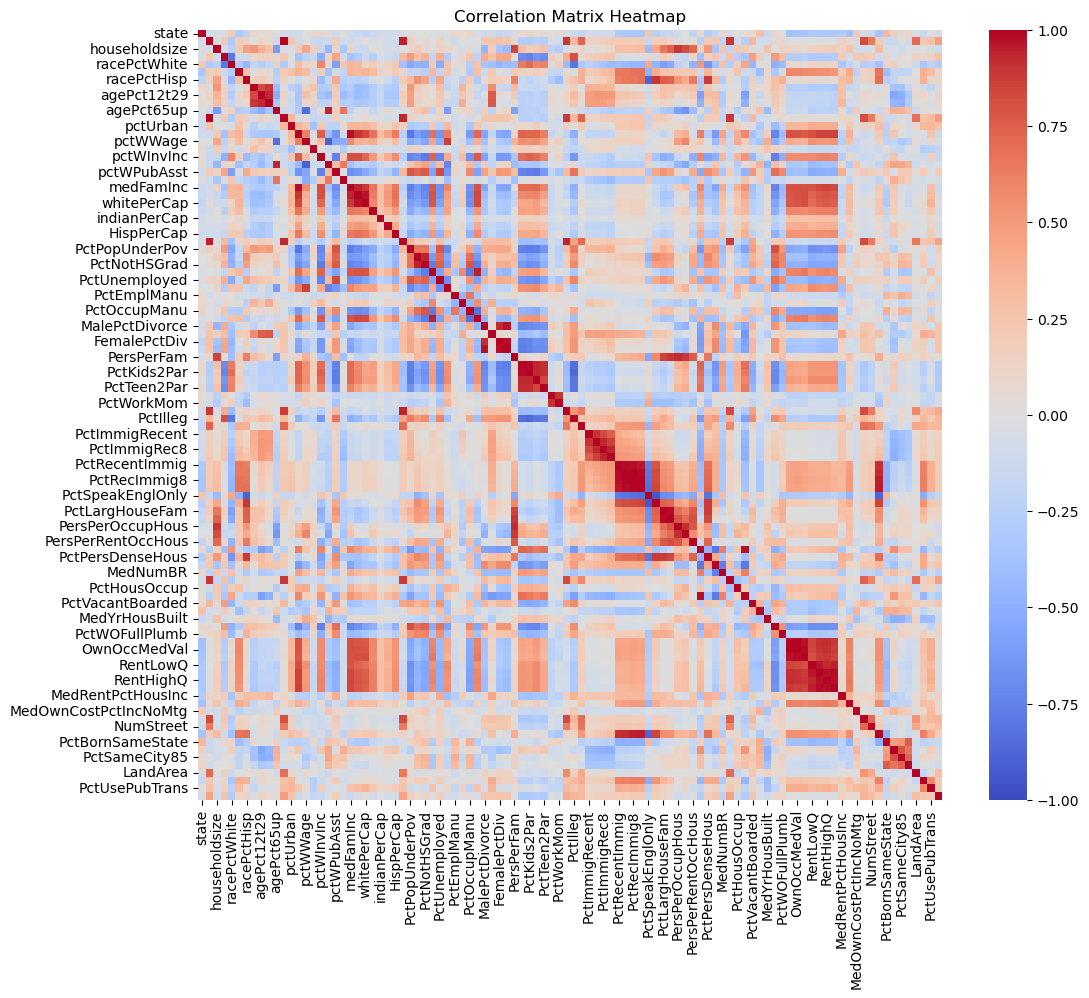

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_only_number.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Analyzing Heatmap
There seems to be several highly correlated features from visual analysis.  There are several hot spots that is visualized by bright red dots.
We will make sure to apply regularization techniques to get around the multicollinearity.



## Building Linear Regression Model
First Splitting the data into Training and Testing data by 80/20 respectively

In [45]:
y_final = y_no_missing
X_final = X_only_number

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2)

# State list must be including 50 states plus DC and 5 Territories for total 56
state_list = [list(range(1, 57))]
# print(state_list)

Now building sklearn LinearRegression with OneHotEncoding in the pipeline

In [46]:

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(categories=state_list), ['state'])  # Specify the column to be encoded
    ],
    remainder='passthrough'  # Keep the other columns as-is
)

# Build a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  OneHotEncoder(categories=[[1,
                                                                             2,
                                                                             3,
                                                                             4,
                                                                             5,
                                                                             6,
                                                                             7,
                                                                             8,
                                                                             9,
                                                                             10,
                                                                             11,
                                                                             12,
                                                                             13,
                                                                             14,
                                                                             15,
                                                                             16,
                                                                             17,
                                                                             18,
                                                                             19,
                                                                             20,
                                                                             21,
                                                                             22,
                                                                             23,
                                                                             24,
                                                                             25,
                                                                             26,
                                                                             27,
                                                                             28,
                                                                             29,
                                                                             30, ...]]),
                                                  ['state'])])),
                ('model', LinearRegression())])

In [47]:
from sklearn.metrics import r2_score

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print("R² Score (Training):", r2_score(y_train, y_train_pred))
print("R² Score (Testing):", r2_score(y_test, y_test_pred))

R² Score (Training): 0.7310169440122791
R² Score (Testing): -8.64412249875445e+21


## Analyzing Linear Regression
While R2 score for training data is okay, the testing data has negative R2 score which is really bad.  This is due to multicollinearity as we suspected before.  We will need to use regularization or PCA for dimensionality reduction.  Here's we will use regularization.

In [53]:
from sklearn.linear_model import Ridge

preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(categories=state_list), ['state'])  # Specify the column to be encoded
    ],
    remainder='passthrough'  # Keep the other columns as-is
)

# Build a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  OneHotEncoder(categories=[[1,
                                                                             2,
                                                                             3,
                                                                             4,
                                                                             5,
                                                                             6,
                                                                             7,
                                                                             8,
                                                                             9,
                                                                             10,
                                                                             11,
                                                                             12,
                                                                             13,
                                                                             14,
                                                                             15,
                                                                             16,
                                                                             17,
                                                                             18,
                                                                             19,
                                                                             20,
                                                                             21,
                                                                             22,
                                                                             23,
                                                                             24,
                                                                             25,
                                                                             26,
                                                                             27,
                                                                             28,
                                                                             29,
                                                                             30, ...]]),
                                                  ['state'])])),
                ('model', Ridge())])

In [55]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print("R² Score (Training):", r2_score(y_train, y_train_pred))
print("R² Score (Testing):", r2_score(y_test, y_test_pred))

R² Score (Training): 0.7253755569453106
R² Score (Testing): 0.7216617094920902


#### R2 score is now much better for Linear Regression
Now let's find the right level of regularization using cross validation search

In [66]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

param_grid = {
    "ridge__alpha": [0.1, 1, 5, 10, 20, 50]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('nominal',
                                                                         OneHotEncoder(categories=[[1,
                                                                                                    2,
                                                                                                    3,
                                                                                                    4,
                                                                                                    5,
                                                                                                    6,
                                                                                                    7,
                                                                                                    8,
                                                                                                    9,
                                                                                                    10,
                                                                                                    11,
                                                                                                    12,
                                                                                                    13,
                                                                                                    14,
                                                                                                    15,
                                                                                                    16,
                                                                                                    17,
                                                                                                    18,
                                                                                                    19,
                                                                                                    20,
                                                                                                    21,
                                                                                                    22,
                                                                                                    23,
                                                                                                    24,
                                                                                                    25,
                                                                                                    26,
                                                                                                    27,
                                                                                                    28,
                                                                                                    29,
                                                                                                    30, ...]]),
                                                                         ['state'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1, 5, 10, 20, 50]},
             scoring='r2')

In [68]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

# Evaluate on the test set
y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)

print("R² Score (Training):", r2_score(y_train, y_train_pred))
print("R² Score (Testing):", r2_score(y_test, y_test_pred))

Best parameters: {'ridge__alpha': 5}
Best score: -0.6718209988707483
R² Score (Training): 0.7151448498725128
R² Score (Testing): 0.722285855907079


R2 score is increased marginally increased.

#### GradientBoostingRegressor
Let's try another model that is more resilient to multicollinearity such as Gradient Boosting

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [115]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

print("R² Score (Training):", r2_score(y_train, y_train_pred))
print("R² Score (Testing):", r2_score(y_test, y_test_pred))

R² Score (Training): 0.8522573032662186
R² Score (Testing): 0.7065285549484661


R2 Score is NOT better than Linear Regression.

In [159]:
from sklearn.svm import SVR

# Train a Support Vector Machine Regressor
svm_regressor = SVR(kernel='rbf', C=100, epsilon=0.001)
svm_regressor.fit(X_train, y_train)


SVR(C=100, epsilon=0.001)

In [161]:
y_train_pred = svm_regressor.predict(X_train)
y_test_pred = svm_regressor.predict(X_test)

print("R² Score (Training):", r2_score(y_train, y_train_pred))
print("R² Score (Testing):", r2_score(y_test, y_test_pred))

R² Score (Training): 0.7093432217831459
R² Score (Testing): 0.7210549560158718


The best R2 score was achieved with C=100 and epsilon=0.001
However it is still below the best score from Linear Regression
This suggests that the relationship between features and the target might be predominantly linear